In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
df_casual = pd.read_pickle('../datos_finales/archivo_casual.pkl')
df_casual.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_casuales
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,331
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,131


In [3]:
df_registrados = pd.read_pickle('../datos_finales/archivo_registrados.pkl')
df_registrados.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_registrados
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,654
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,670


In [4]:
df_total = pd.read_pickle('../datos_finales/archivo_total.pkl')
df_total.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,total_usuarios
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,985
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,801


In [6]:
numericas = df_total.select_dtypes(np.number).drop("total_usuarios", axis= 1).drop('año', axis = 1)

In [7]:
robust = RobustScaler()
numericas_robust = pd.DataFrame(robust.fit_transform(numericas), columns = numericas.columns)
numericas_robust.head(2)

,temperatura,humedad,velocidad_viento
0,-0.486274,0.855582,-0.208909
1,-0.425690,0.332722,0.687550


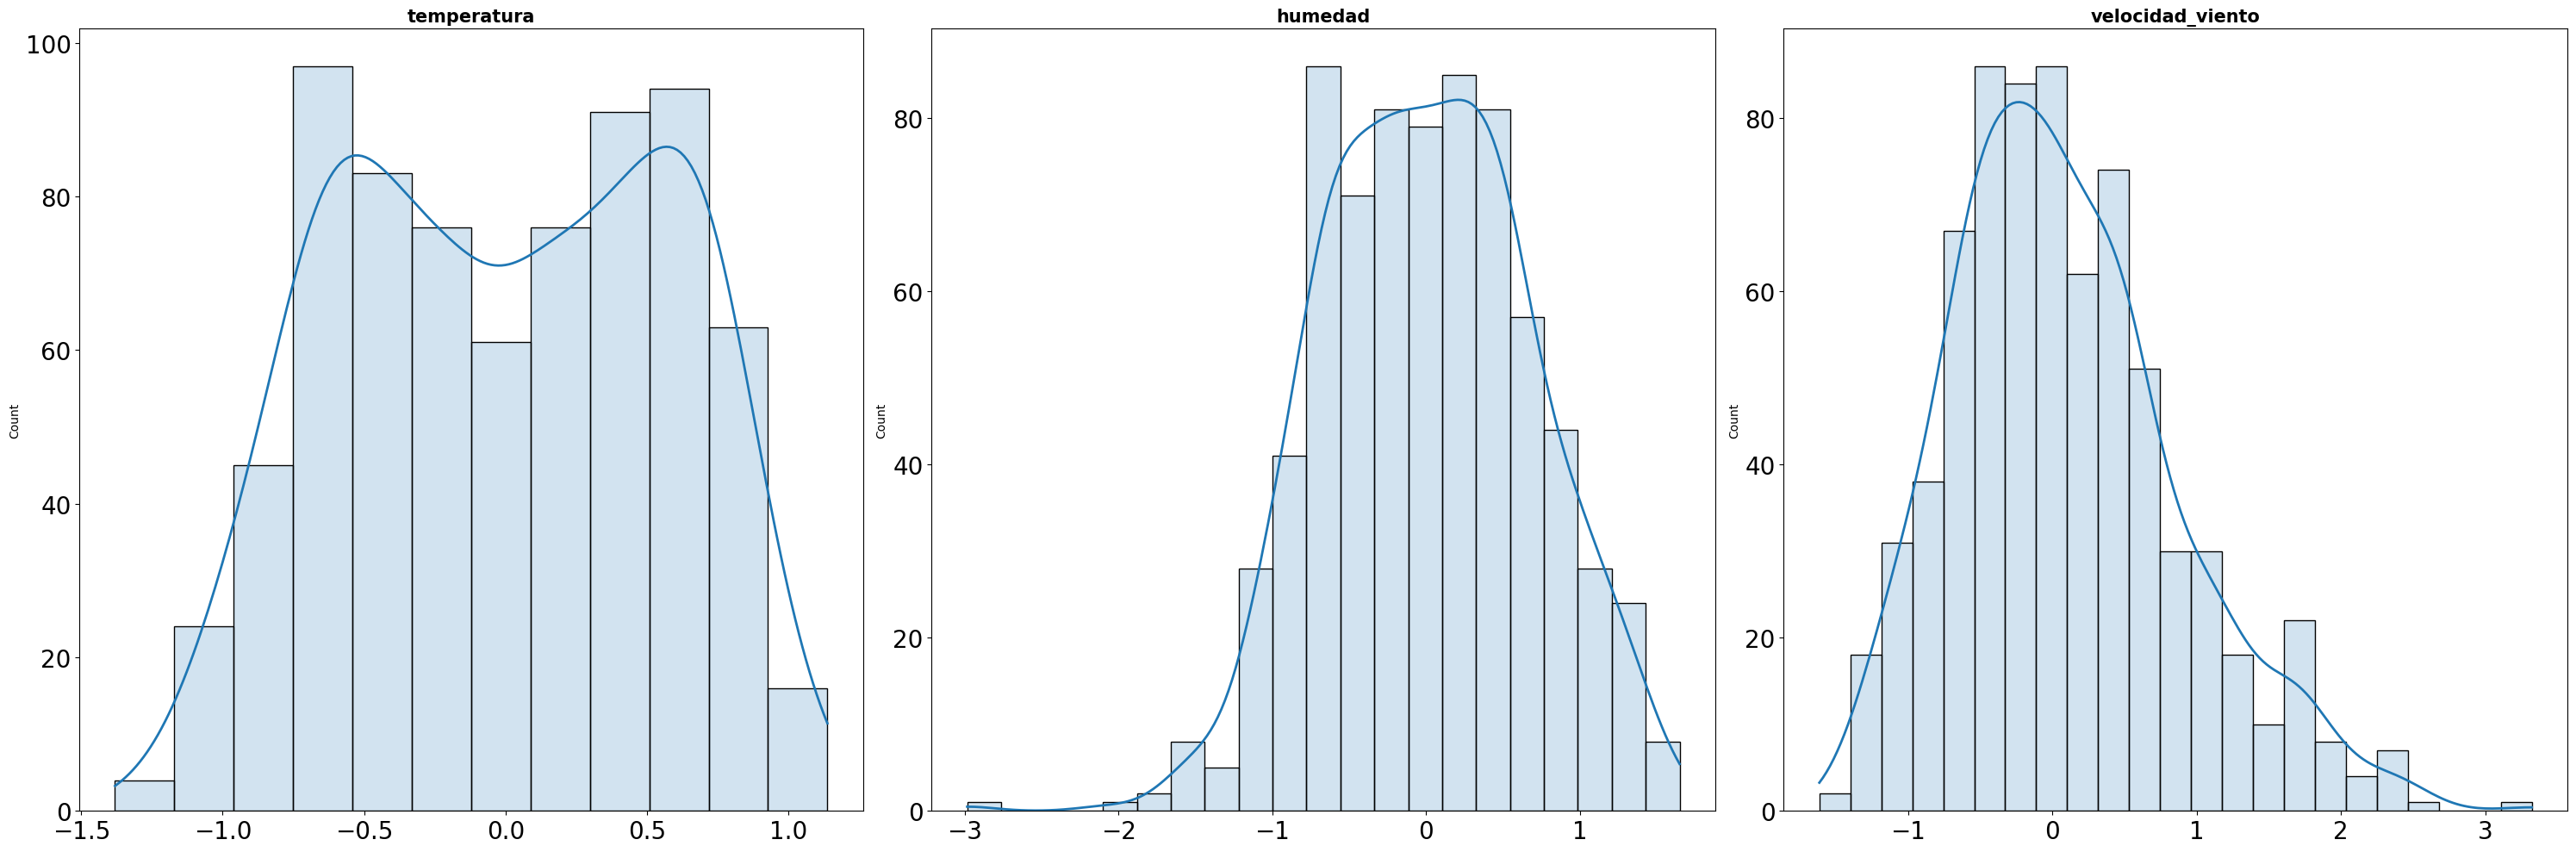

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns

axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

In [9]:
for col in columnas_robust:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas[col], "norm")[-1]}')

La columna temperatura, tiene el p-valor 0.0
La columna humedad, tiene el p-valor 0.0
La columna velocidad_viento, tiene el p-valor 0.0


In [12]:
scaler = StandardScaler()

In [13]:
numericas_estandar = pd.DataFrame(scaler.fit_transform(numericas), columns = numericas.columns)
numericas_estandar.head(2)

,temperatura,humedad,velocidad_viento
0,-0.827613,1.252343,-0.387833
1,-0.722069,0.480996,0.748899


In [14]:
for col in numericas_estandar.columns:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas_estandar[col], "norm")[-1]}')

La columna temperatura, tiene el p-valor 0.0008168084884888232
La columna humedad, tiene el p-valor 0.36110084353861616
La columna velocidad_viento, tiene el p-valor 0.00675715145775531


In [15]:
def estandarizacion_manual(df, lista_cols):
    for col in lista_cols:
        media = df[col].mean()
        desviacion = df[col].std()
        df[col] = (df[col] - media) / desviacion
        

In [16]:
estandarizacion_manual(numericas, numericas.columns)

In [ ]:
for col in numericas_estandar.columns:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas_estandar[col], "norm")[-1]}')